# Import some packages

You should load packages you may need in this project first

In [1]:
import skimage.io
import skimage.color
import skimage.transform
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import os
import random

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

2023-05-07 14:53:31.657489: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Load character data from the dataset subfolder


In [2]:
# # provide your code here
# DATASET_DIR = './dataset/'
# classes = os.listdir(DATASET_DIR)
# data = []
# for cls in classes:
#     files = os.listdir(DATASET_DIR + cls)
#     for f in files:
#         img_path = DATASET_DIR + cls + '/' + f
#         img = skimage.io.imread(img_path, as_gray = True)
#         # if img.shape[-1] == 3:
#         #     img = skimage.color.rgb2gray(img)
#         data.append({
#             'x': img,
#             'y': cls
#         })
        
# random.shuffle(data) 

# provide your code here
DATASET_DIR = './dataset/'
classes = os.listdir(DATASET_DIR)
data = []
for cls in classes:
    files = os.listdir(DATASET_DIR +cls)
    for f in files:
        img = skimage.io.imread(DATASET_DIR +cls +"/" +f)
        if img.shape[-1] == 3:
            img = skimage.color.rgb2gray(img)
        data.append({
            'x': img,
            'y': cls
        })
        
random.shuffle(data) 

(20, 20)

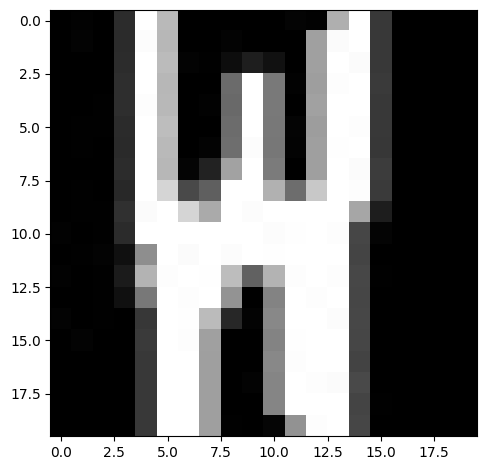

In [3]:
# display the image after reading
display(img.shape)
skimage.io.imshow(img);

# create train data set and test data set 
Using 80/20 rule, 80 precent for trainning, and 20 percent for testing.

In [4]:
# def getRandomIndex(n, x):
#     # the index is from 0 to n, not included n, and the index is not replace
#     index = np.random.choice(np.arange(n), size=x, replace=False)
#     return index

In [5]:
from sklearn.model_selection import train_test_split

X = [d['x'] for d in data]
y = [d['y'] for d in data]

ys = list(np.unique(y))
y = [ys.index(v) for v in y]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 22)

# # generate random index
# train_index = getRandomIndex(len(X),int(len(X)*0.8))
# test_index = np.delete(np.arange(len(X)), train_index)

# x_train = [X[i] for i in train_index.tolist()]
# y_train = [y[i] for i in train_index.tolist()]

# x_test = [X[i] for i in test_index.tolist()]
# y_test = [y[i] for i in test_index.tolist()]

# Examming and Understand data set for trainning


In [6]:
# you may print out some infomation about train data set 
print(x_train[0])
print(y_train)
print(len(y_train))

[[  0   0   0   0   0   0   0   0   0   2   0  17 202 241  27   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 117 255 255 166   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   1   0   0 115 253 255 162   2   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   2   1  49 255 255 248 171   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0 255 254 253 255 167   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   1   0 253 255 255 254 162   2   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0 208 255 252 255 255 166   2   0   0
    0   0]
 [  0   0   0   0   0   0   0   0 141 255 255 227 238 255 168   0   0   0
    0   0]
 [  0   0   3   0   0   2   0   0 140 254 233  63 191 255 165   0   0   0
    0   0]
 [  1   1   0   0   0   0   6  53 239 255 218   0 193 255 167   0   0   0
    0   0]
 [  0   2   2   1   1   1   0  92 253 253   1   5 188 255 163   1   0   0
    0   0]
 [  2   0   2   0   0   2   2 255 255 158   1   0 192 255 167   2

# Decide a few parameters for trainning

such as batch size, epochs, image size in rows and colomns, etc.

In [7]:
# you decide those parameters below
batch_size = 128
#num_classes = len(np.unique(y))
num_classes = len(ys)
epochs = 40

## input image dimensions
img_rows, img_cols = x_train[0].shape

label_type_num = len(ys)

In [8]:
#Extend the data chennels to 4 dimemsions
display(img_rows, img_cols)

20

20

In [9]:
def extend_channel(data):
    data = np.array(data)
    if K.image_data_format() == 'channels_first':
        data = data.reshape(data.shape[0], 1, img_rows, img_cols)
    else:
        data = data.reshape(data.shape[0], img_rows, img_cols, 1)
        
    return data

x_train = extend_channel(x_train)
x_test = extend_channel(x_test)

input_shape = x_train.shape[1:]

# Data normalization

In [10]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

#TODO
# y_train and y_test need to tranform to numbers
#keras.utils.to_categorical(y, num_classes=None, dtype='float32')
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=num_classes, dtype='float32')
y_test = to_categorical(np.array(y_test), num_classes=num_classes, dtype='float32')

In [11]:
input_shape = x_train.shape[1:]
display(x_train.shape)
display(y_train.shape)
display(input_shape)
display(x_test.shape)
display(y_test.shape)

(12916, 20, 20, 1)

(12916, 65)

(20, 20, 1)

(3229, 20, 20, 1)

(3229, 65)

# Create a CNN model for character recognition

This is an important part of this project. You have to create a cnn model using tensorflow and keras to train the data.


In [12]:
#You can refer to the LeNet on the project 4
# or use the same sample model in carplate_recognition.ipynb
import tensorflow as tf

model = Sequential()
model.call = tf.function(model.call)
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

2023-05-07 14:53:43.803414: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Compile the model

In [13]:
# tenslrflow 1.x
# modelcompile(loss,optimizer,metrics)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 18, 18, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 64)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 8, 8, 64)          0         
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 128)               524416    
                                                        

# Train your model


In [14]:
#model.fit(x = , y = ,
#          batch_size=,
#          epochs=,
#          verbose=,
#          validation_data=)

epochs = 40
batch_size = 128

# check whether the model has already been saved,
# if so, we can directly use it without training again.
is_available = False
if(is_available):
    model.load_weights("char_cnn.h5")

cnn_model = model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs,validation_freq=1, validation_split=0.2)
score = model.evaluate(x_test, y_test)
print("Loss: ",score[0])
print("Accuracy: ", score[1])

Epoch 1/40
81/81 [==============================] - 7s 65ms/step - loss: 1.9733 - accuracy: 0.5402 - val_loss: 0.5820 - val_accuracy: 0.8680
Epoch 2/40
81/81 [==============================] - 5s 67ms/step - loss: 0.6073 - accuracy: 0.8538 - val_loss: 0.2646 - val_accuracy: 0.9485
Epoch 3/40
81/81 [==============================] - 5s 61ms/step - loss: 0.3786 - accuracy: 0.9021 - val_loss: 0.1870 - val_accuracy: 0.9617
Epoch 4/40
81/81 [==============================] - 5s 61ms/step - loss: 0.2839 - accuracy: 0.9279 - val_loss: 0.1518 - val_accuracy: 0.9675
Epoch 5/40
81/81 [==============================] - 5s 62ms/step - loss: 0.2242 - accuracy: 0.9416 - val_loss: 0.1304 - val_accuracy: 0.9725
Epoch 6/40
81/81 [==============================] - 5s 62ms/step - loss: 0.1905 - accuracy: 0.9494 - val_loss: 0.1253 - val_accuracy: 0.9721
Epoch 7/40
81/81 [==============================] - 5s 63ms/step - loss: 0.1654 - accuracy: 0.9542 - val_loss: 0.1205 - val_accuracy: 0.9733
Epoch 8/40
81

# Visualize training results

In [15]:
print(cnn_model.history)


{'loss': [1.9732568264007568, 0.607297956943512, 0.3786304295063019, 0.28387778997421265, 0.2242380827665329, 0.19048427045345306, 0.16539306938648224, 0.1413518488407135, 0.13757586479187012, 0.12449989467859268, 0.1092832013964653, 0.10461284220218658, 0.09729495644569397, 0.0958697497844696, 0.08340281248092651, 0.08891380578279495, 0.07554163038730621, 0.0812099426984787, 0.06954433768987656, 0.06679388135671616, 0.0694083496928215, 0.0647829920053482, 0.06171949952840805, 0.058281462639570236, 0.05697650834918022, 0.05458655580878258, 0.05596279352903366, 0.05672587454319, 0.05493513122200966, 0.056454382836818695, 0.05485060438513756, 0.05270346626639366, 0.05331199988722801, 0.05543356388807297, 0.0457683764398098, 0.048699941486120224, 0.046679574996232986, 0.04483713582158089, 0.04566746950149536, 0.04767562076449394], 'accuracy': [0.5401664972305298, 0.8537552952766418, 0.9020518660545349, 0.9278939366340637, 0.9416376352310181, 0.9493805766105652, 0.9542198777198792, 0.96070

In [16]:
acc = cnn_model.history['accuracy']
val_acc = cnn_model.history['val_accuracy']
loss = cnn_model.history['loss']
val_loss = cnn_model.history['val_loss']
epochs_range = range(epochs)

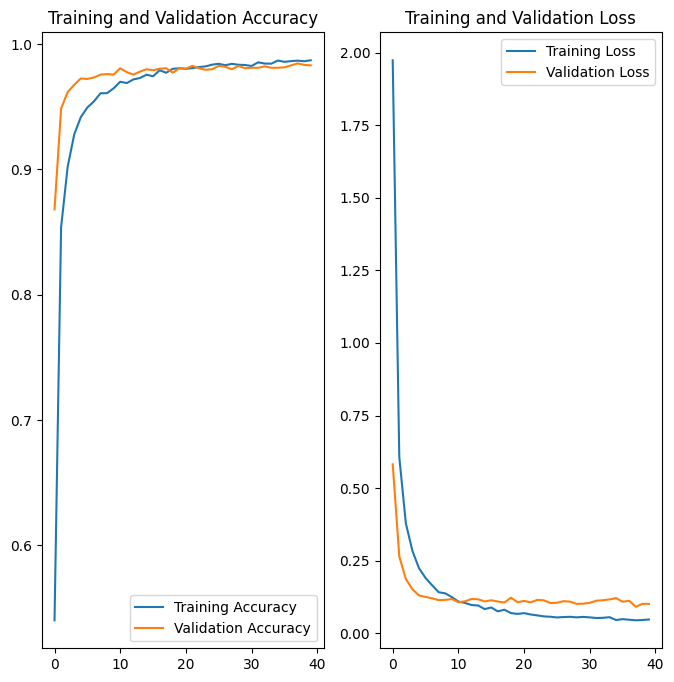

In [17]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Model Evaluation 

Evaluate your model with test dataset.

make sure your model accuracy should be more than 97 percent. Otherwise, you have to go back to fine tune your model with whatever methods you have learned to improve its accuracy. You have to handle over-fitting or under-fitting problem you may encounter.

In [18]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

101/101 [==============================] - 0s 4ms/step - loss: 0.1353 - accuracy: 0.9762
Test loss: 0.1353481262922287
Test accuracy: 0.9761536121368408


# Save your model weights

You should save your model for car plate recognition purpose later.


In [19]:
# when you finish training, you should save your model in a file
# for carplate_recognition.ipynb
# since it will use this model to recognize car plates 
model.save_weights('char_cnn.h5')